# Fermion parity switches imprinted in the photonic field of cavity embedded Kitaev chains

In this notebook we plot figures 3, 4, 10 and 12 of the manuscript entitled ``[Fermion parity switches imprinted in the photonic field of cavity embedded Kitaev chains](https://arxiv.org/abs/2506.06237)''.  

In [1]:
import numpy as np
import h5py
import itertools
import matplotlib.pyplot as plt

from scipy.sparse import eye, coo_array, bmat

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": "11.0"
})

In [3]:
n_sites = 11
mx_Nph = 21

In [4]:
def ph_numb_op():

    ph_numb = 0*eye(int(2**(n_sites-1)))
    for n_ph in range(1,mx_Nph):
        ph_numb = bmat([[ph_numb,None],[None,n_ph*eye(int(2**(n_sites-1)))]])

    return ph_numb

In [5]:
N_phot = ph_numb_op()

def phn_av(arrcomp,E_ev,E_od,gnd_ev,gnd_od):

    #print(N_phot.shape,ground_ev.shape)
    
    evenodd = []

    for ii in range(len(arrcomp)):
        if E_ev[ii,0] <= E_od[ii,0]:
            evenodd.append(np.dot(np.conj(gnd_ev[ii,::]),N_phot.dot(gnd_ev[ii,::])))
        else:
            evenodd.append(np.dot(np.conj(gnd_od[ii,::]),N_phot.dot(gnd_od[ii,::])))

    return np.array(evenodd)

def photoN(arrcomp,Vec_ev,Vec_od,nn):

    #print(N_phot.shape,ground_ev.shape)
    
    occupation = []

    for ii in range(len(arrcomp)):

        occupation.append(np.dot(np.conj(Vec_ev[ii,::,nn]),N_phot.dot(Vec_ev[ii,::,nn])))
        occupation.append(np.dot(np.conj(Vec_od[ii,::,nn]),N_phot.dot(Vec_od[ii,::,nn])))

    return np.array(occupation)

In [7]:
# Importing the energies and states of the cavity-embedded system
freqlist = [0.3,0.5,0.8]  

folroot = './data_ED/'
prename = 'EVecs_vs_mu_w'
lstname = '_g0.25_ns_'+str(n_sites)+'.hdf5'
flist = [folroot+prename+str(ww)+lstname for ww in freqlist]

files = [h5py.File(files,'r') for files in flist]

The cell below contains instructions to make figure 3 in the manuscript.

[1.8928203230275509, 1.697056274847714, 1.3856406460551018, 0.9797958971132714, 0.507179676972449, -0.507179676972449]


/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


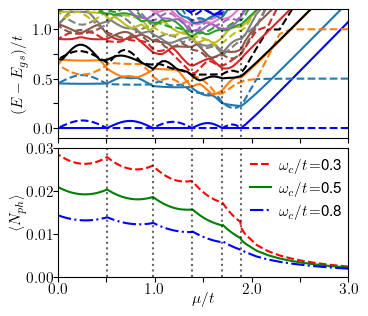

In [8]:
fig, sub = plt.subplots(2,1, sharex=True, figsize = (3.5,3.0))

clist = ['C6','C4','C2','blue','C0','C1','black','C3','C5','C7','C8',
         'C2','C4','C6','C0','blue','C1','C5','black']

colimlist = ['red','green','blue']
lstyle = ['--','-','-.']

n = n_sites
if n % 2 == 0:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*n)+1)]
else:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*(n-1))+1)]

muroots.append(-muroots[-1])
print(muroots)

i0 = 1
arrcomp = files[i0].get('mu')
array_ev = files[i0].get('E_mat_par_even')
array_od = files[i0].get('E_mat_par_odd')
ground_ev = files[i0].get('V_mat_par_even')
ground_od = files[i0].get('V_mat_par_odd')

gnd = np.array([min(array_ev[ii,0],array_od[ii,0]) for ii in range(len(arrcomp[::]))])

for ll in range(16):
    sub[0].plot(arrcomp[::],array_ev[::,ll]-gnd, '-', color=clist[ll+3])
    sub[0].plot(arrcomp[::],array_od[::,ll]-gnd, '--', color=clist[ll+3])
        
for ii in range(3):
    arrcomp = files[ii].get('mu')
    array_ev = files[ii].get('E_mat_par_even')
    array_od = files[ii].get('E_mat_par_odd')
    ground_ev = files[ii].get('V_mat_par_even')
    ground_od = files[ii].get('V_mat_par_odd')

    ph_numb = phn_av(arrcomp,array_ev,array_od,ground_ev[::,::,0],ground_od[::,::,0])
    
    sub[1].plot(arrcomp[::],ph_numb, ls=lstyle[ii], color=colimlist[ii], 
                label=r'$\omega_c/t\!=$'+str.format('{:.1f}',freqlist[ii]))


for murts in muroots:
    sub[0].plot(murts*np.ones(len(muroots)),np.linspace(-0.2,1.7,len(muroots)), ':k', alpha=0.6)
    sub[1].plot(murts*np.ones(len(muroots)),np.linspace(0.0,0.033,len(muroots)), ':k', alpha=0.6)
    #sub[0].plot(murts,0.0, 'sk', alpha=0.9, ms=7, fillstyle='none')

for ii in range(2):
    sub[ii].tick_params(axis='y', pad=0.2)
    sub[ii].tick_params(axis='x', pad=0.5)
    
sub[1].legend(frameon=False, loc=(0.64,0.4), handlelength=1.4, handletextpad=0.5)

sub[0].set_ylim(-0.1,1.2)
sub[0].set_yticks(np.linspace(0,1.0,5))
sub[0].set_yticklabels([r'$0.0$','',r'$0.5$','',r'$1.0$'])
sub[1].set_xlabel(r'$\mu/t$', x=0.5, labelpad=-4.0)
sub[1].set_xlim(0.0,3.0)
sub[1].set_xticks(np.linspace(0,3,7))
sub[1].set_xticklabels([r'$0.0$','',r'$1.0$','',r'$2.0$','',r'$3.0$'])
sub[1].set_ylim(0.0,0.03)


sub[0].set_ylabel(r'$(E-E_{gs})/t$', rotation='vertical',y=0.5, labelpad=4)
sub[1].set_ylabel(r'$\langle N_{ph} \rangle$', rotation='vertical', labelpad=0, y=0.51)

fig.subplots_adjust(left=0.14, right=0.97, hspace=0.08, top=0.99,bottom=0.099)
fl_comp = '_w'+str.format('{:.1f}',freqlist[i0])
plt.savefig('energy_ph_number'+fl_comp+'_vert.pdf')

## Photon number in excited states

The cell below contains instructions to make figure 10 (5) in the manuscript (appendix).

/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


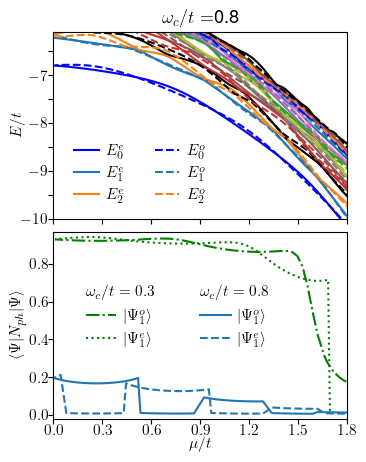

In [9]:
fig, sub = plt.subplots(2,1, sharex=True, figsize = (3.5,4.25))

colimlist = ['green','red','C0','blue']
lstyle = [':','-.','--','-']
Elist = [r'$E_0^e$',r'$E_1^e$',r'$E_2^e$',r'$E_0^o$',r'$E_1^o$',r'$E_2^o$']

i0 = 2
arrcomp = files[i0].get('mu')
energy_ev = files[i0].get('E_mat_par_even')
energy_od = files[i0].get('E_mat_par_odd')
Vcs_ev = files[i0].get('V_mat_par_even')
Vcs_od = files[i0].get('V_mat_par_odd')

for ll in range(16):
    if ll < 3:
        sub[0].plot(arrcomp[::],energy_ev[::,ll], '-', color=clist[ll+3], label=Elist[ll])
    else:
        sub[0].plot(arrcomp[::],energy_ev[::,ll], '-', color=clist[ll+3])

for ll in range(16):
    if ll < 3:
        sub[0].plot(arrcomp[::],energy_od[::,ll], '--', color=clist[ll+3], label=Elist[ll+3])
    else:
        sub[0].plot(arrcomp[::],energy_od[::,ll], '--', color=clist[ll+3])
        
for ii in range(0,3,2):
    arrcomp = files[ii].get('mu')
    energy_ev = files[ii].get('E_mat_par_even')
    energy_od = files[ii].get('E_mat_par_odd')
    Vcs_ev = files[ii].get('V_mat_par_even')
    Vcs_od = files[ii].get('V_mat_par_odd')

    ph_numb = photoN(arrcomp,Vcs_ev,Vcs_od,1)

    sub[1].plot(arrcomp[::],ph_numb[0::2], ls=lstyle[ii+1], color=colimlist[ii], label=r'$|\Psi_1^o\rangle$')
    sub[1].plot(arrcomp[::],ph_numb[1::2], ls=lstyle[ii], color=colimlist[ii], label=r'$|\Psi_1^e\rangle$')


for ii in range(2):
    sub[ii].tick_params(axis='y', pad=0.2)
    sub[ii].tick_params(axis='x', pad=0.5)

sub[0].legend(frameon=False, loc=(0.05,0.05), ncols=2, handlelength=1.6, handletextpad=0.5)
sub[1].legend(frameon=False, loc=(0.09,0.35), ncols=2, handlelength=2.0, 
              columnspacing=3.1, handletextpad=0.5)

sub[0].set_title(r'$\omega_c/t=$'+str(freqlist[i0]))
sub[0].set_ylim(-10,-6.1)
sub[0].set_yticks(np.linspace(-10,-6.5,8))
sub[0].set_yticklabels([r'$-10$','',r'$-9$','',r'$-8$','',r'$-7$',''])
sub[1].set_xlim(0.0,1.8)
sub[1].set_xticks(np.linspace(0,1.8,7))
sub[1].set_xlabel(r'$\mu/t$', x=0.5, labelpad=-1.0)
sub[1].set_ylim(-0.02,0.97)
sub[1].text(0.2,0.63,r'$\omega_c/t = 0.3$')
sub[1].text(0.9,0.63,r'$\omega_c/t = 0.8$')
sub[0].set_ylabel(r'$E/t$', rotation='vertical',y=0.5, labelpad=-3)
sub[1].set_ylabel(r'$\langle \Psi | N_{ph} | \Psi \rangle$', rotation='vertical', labelpad=2, y=0.51)

fig.subplots_adjust(left=0.13, right=0.97, hspace=0.07, top=0.99,bottom=0.08)
fl_comp = '_w'+str.format('{:.1f}',freqlist[i0])
plt.savefig('energy_ph_number_excited.pdf')

In [10]:
def a_op_bos(ph_mxn):

    el_dim = int(2**(n_sites-1)) 
    identity = eye(el_dim)
    
    op_list = [[np.sqrt(ii+1)*identity if jj - 1  == ii else None for jj in range(ph_mxn)] for ii in range(ph_mxn)]

    rup_blck = bmat(op_list)

    zero_col = [[0]*el_dim]*(el_dim*(ph_mxn-1))
    zero_row = [[0]*(el_dim*(ph_mxn-1))]*el_dim
    return bmat([[zero_col,rup_blck],[None,zero_row]])

In [11]:
aa = a_op_bos(mx_Nph)
#N_phot = ph_numb_op()
#N = ph_numb_op()
    
def quadratures(vst):
    
    prod0 = np.dot(np.conjugate(vst),N_phot.dot(vst))
    norm = np.dot(np.conjugate(vst),vst)
    prod1 = np.dot(np.conjugate(vst),aa.dot(aa.dot(vst)))
    prod2 = np.dot(np.conjugate(vst),aa.T.dot(aa.T.dot(vst)))

    mean_a = np.dot(np.conjugate(vst),aa.dot(vst))
    mean_adag = np.dot(np.conjugate(vst),aa.T.dot(vst))
                  
    Xquad = (mean_a+mean_adag)/np.sqrt(2)
    Pquad = 1j*(mean_a-mean_adag)/np.sqrt(2)
    Xquad2 = prod0 + 0.5*(norm + prod1 + prod2)
    Pquad2 = prod0 + 0.5*(norm - prod1 - prod2)
    
    return Xquad, Pquad, Xquad2, Pquad2

In [12]:
def quad_gnd_pick(even,Vs_ev,odd,Vs_od):

    quads = []
    for ii in range(len(even[::,0])):
        quadsat = []
        if even[ii,0] < odd[ii,0]:
            X, P, X2, P2 = quadratures(Vs_ev[ii,::,0]) 
            quadsat.append(X)
            quadsat.append(P)
            quadsat.append(X2)
            quadsat.append(P2)
        else:
            X, P, X2, P2 = quadratures(Vs_od[ii,::,0])
            quadsat.append(X)
            quadsat.append(P)
            quadsat.append(X2)
            quadsat.append(P2)
        quads.append(quadsat)
            
    return np.array(quads)

The cell below contains instructions to make figure 4 in the manuscript.

/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


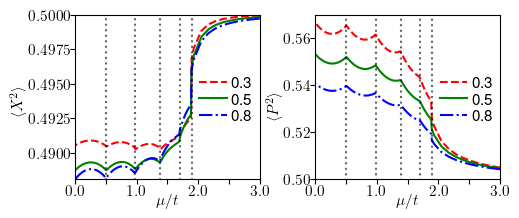

In [13]:
fig, sub = plt.subplots(1,2, figsize=(5.0,2.0), sharex=True)

colimlist = ['red','green','blue']
lstyle = ['--','-','-.']

n = n_sites
if n % 2 == 0:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*n)+1)]
else:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*(n-1))+1)]

for ii in range(3):

    arrcomp = files[ii].get('mu')
    array_ev = files[ii].get('E_mat_par_even')
    array_od = files[ii].get('E_mat_par_odd')
    ground_ev = files[ii].get('V_mat_par_even')
    ground_od = files[ii].get('V_mat_par_odd')

    quad_mtx = quad_gnd_pick(array_ev,ground_ev,array_od,ground_od)
    
    sub[0].plot(arrcomp[::],quad_mtx[::,2]-quad_mtx[::,0]**2, ls=lstyle[ii], 
                label=str.format('{:.1f}',freqlist[ii]),color=colimlist[ii])
    sub[1].plot(arrcomp[::],quad_mtx[::,3]-quad_mtx[::,1]**2, ls=lstyle[ii], 
                label=str.format('{:.1f}',freqlist[ii]),color=colimlist[ii])        
 

for murts in muroots:
    sub[0].plot(murts*np.ones(len(muroots)),np.linspace(0.485,0.57,len(muroots)), ':k', alpha=0.6)
    sub[1].plot(murts*np.ones(len(muroots)),np.linspace(0.485,0.57,len(muroots)), ':k', alpha=0.6)

for ii in range(2):
    sub[ii].tick_params(axis='y', pad=0.2)
    sub[ii].tick_params(axis='x', pad=0.5)
    sub[ii].set_xlabel(r'$\mu/t$', labelpad=-4)
    sub[ii].set_xticks(np.linspace(0,3,7))
    sub[ii].set_xticklabels([r'$0.0$','',r'$1.0$','',r'$2.0$','',r'$3.0$'])
    sub[ii].legend(frameon=False, loc=(0.64,0.3), ncols=1, handlelength=1.8, handletextpad=0.3, 
                   labelspacing = 0.15, columnspacing=0.33)

sub[0].set_ylabel(r'$\langle X^{2}\rangle$', y=0.48, labelpad=1)
sub[1].set_ylabel(r'$\langle P^{2}\rangle$', y=0.45, labelpad=1)
sub[0].set_xlim(0.0,3.0)

sub[1].set_ylim(0.5,0.57)
sub[0].set_ylim(quad_mtx[-1,2],0.500)

fig.subplots_adjust(left=0.125, right=0.975, wspace=0.3, top=0.97,bottom=0.15)
plt.savefig('quad_vs_mu.pdf')

In [14]:
# Importing the energy and states of the cavity embedded system
mulist = [0.25,0.75,1.25,1.5]
folroot = './data_ED/'
prename = 'Evecs_vs_w_mu'
midname = '_g0.25'
lstname = '_ns_'+str(n_sites)+'.hdf5'
flist = [folroot+prename+str(mu)+midname+lstname for mu in mulist]

files = [h5py.File(files,'r') for files in flist]

The cell below contains instructions to make figure 11 (6) in the manuscript (appaendix).

(49, 50)
(49, 50)
(49, 50)


/Users/victor.fernandez-becerra/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(49, 50)


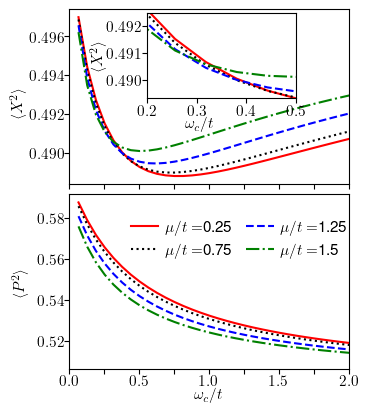

In [15]:
fig, sub = plt.subplots(2,1, figsize=(3.5,4.0), sharex=True)

colimlist = ['red','black','blue','green']
ltype = ['-',':','--','-.']

axins = sub[0].inset_axes([0.28, 0.49, 0.53, 0.49])

for ll in range(4): 

    arrcomp = files[ll].get('w')
    energy_ev = files[ll].get('E_mat_par_even')
    energy_od = files[ll].get('E_mat_par_odd')
    Vcs_ev = files[ll].get('V_mat_par_even')
    Vcs_od = files[ll].get('V_mat_par_odd')

    quad_mtx = quad_gnd_pick(energy_ev,Vcs_ev,energy_od,Vcs_od)
    print(energy_ev.shape)

    sub[1].plot(arrcomp[1::],quad_mtx[1::,3], color=colimlist[ll], 
                ls=ltype[ll], label=r'$\mu/t=$'+str(mulist[ll]))

    sub[0].plot(arrcomp[1::],quad_mtx[1::,2], color=colimlist[ll],
                ls=ltype[ll], label=r'$\mu/t=$') 

    axins.plot(arrcomp[1::],quad_mtx[1::,2], color=colimlist[ll], 
               ls=ltype[ll])
        
for ii in range(2):
    sub[ii].tick_params(axis='y', pad=0.2)
    sub[ii].tick_params(axis='x', pad=0.5)

#sub[0].set_xscale('log')
    
sub[1].legend(frameon=False, ncols=2, handlelength=1.8, handletextpad=0.4,
             columnspacing=0.9, loc=(0.2,0.6))

sub[1].set_xlim(0.0,2.0)
sub[1].set_xticks(np.linspace(0.0,2.0,9))
sub[0].set_xticklabels([r'$0.0$','',r'$0.5$','',r'$1.0$','',r'$1.5$','',r'$2.0$'])

axins.set_xlim(0.2,0.5)
axins.set_ylim(0.4893,0.4925)
axins.set_yticks(np.linspace(0.49,0.492,3))
axins.tick_params(axis='y', pad=1.0)
axins.tick_params(axis='x', pad=0.5)
axins.set_xlabel(r'$\omega_c/t$', labelpad=-1.5, x=0.35)
axins.set_ylabel(r'$\langle X^2\rangle$', rotation='vertical', y=0.51,
                 labelpad=0)

sub[0].set_ylabel(r'$\langle X^2\rangle$', rotation='vertical', y=0.47,
                 labelpad=2)
sub[1].set_ylabel(r'$\langle P^2\rangle$', rotation='vertical', y=0.50,
                 labelpad=6)
sub[1].set_xlabel(r'$\omega_c/t$', labelpad=-1.5)

fig.subplots_adjust(left=0.17, right=0.97, hspace=0.06, top=0.99,bottom=0.09)
plt.savefig('quad_vs_omg_inset.pdf')